In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

In [2]:
traindf = pd.read_csv('Train.csv')

In [3]:
testdf = pd.read_csv('Test.csv')

In [4]:
traindf.head()

,RI,QA-check,Color-check,Purity-Level,Depth-percentage,Width-of-iron-top-width,Axis-x,Axis-y,Axis-z,Price-in-dollars,ID
0,1.01,Premium,H,VS1,61.9,57.0,6.43,6.39,3.97,4779,uid_36947
1,0.41,Premium,E,VS1,59.8,61.0,4.85,4.79,2.88,1153,uid_36834
2,2.18,Premium,H,SI2,62.3,59.0,8.37,8.26,5.18,11579,uid_39061
3,0.71,Very Good,F,VS2,59.5,58.0,5.82,5.87,3.48,2918,uid_39213
4,0.70,Ideal,E,SI2,61.0,55.0,5.76,5.78,3.52,2332,uid_15924


In [5]:
traindf.isnull().sum()

RI                         0
QA-check                   0
Color-check                0
Purity-Level               0
Depth-percentage           0
Width-of-iron-top-width    0
Axis-x                     0
Axis-y                     0
Axis-z                     0
Price-in-dollars           0
ID                         0
dtype: int64

In [6]:
traindf.describe()

,RI,Depth-percentage,Width-of-iron-top-width,Axis-x,Axis-y,Axis-z,Price-in-dollars
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797281,61.751890,57.462519,5.728220,5.732077,3.537441,3929.913336
std,0.474670,1.435349,2.237100,1.124582,1.154167,0.710563,3995.236128
min,0.200000,43.000000,44.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2398.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,5312.500000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = traindf.select_dtypes(include=numerics)

In [8]:
newdf.head()

,RI,Depth-percentage,Width-of-iron-top-width,Axis-x,Axis-y,Axis-z,Price-in-dollars
0,1.01,61.9,57.0,6.43,6.39,3.97,4779
1,0.41,59.8,61.0,4.85,4.79,2.88,1153
2,2.18,62.3,59.0,8.37,8.26,5.18,11579
3,0.71,59.5,58.0,5.82,5.87,3.48,2918
4,0.70,61.0,55.0,5.76,5.78,3.52,2332


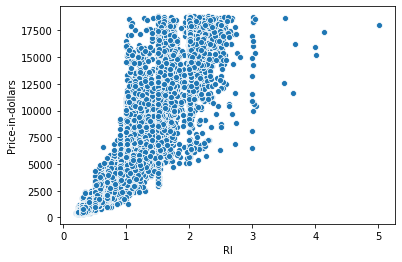

In [9]:
sns.scatterplot(x='RI',y = 'Price-in-dollars',data = traindf)

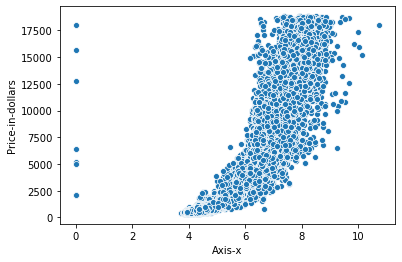

In [10]:
sns.scatterplot(x='Axis-x',y = 'Price-in-dollars',data = traindf)

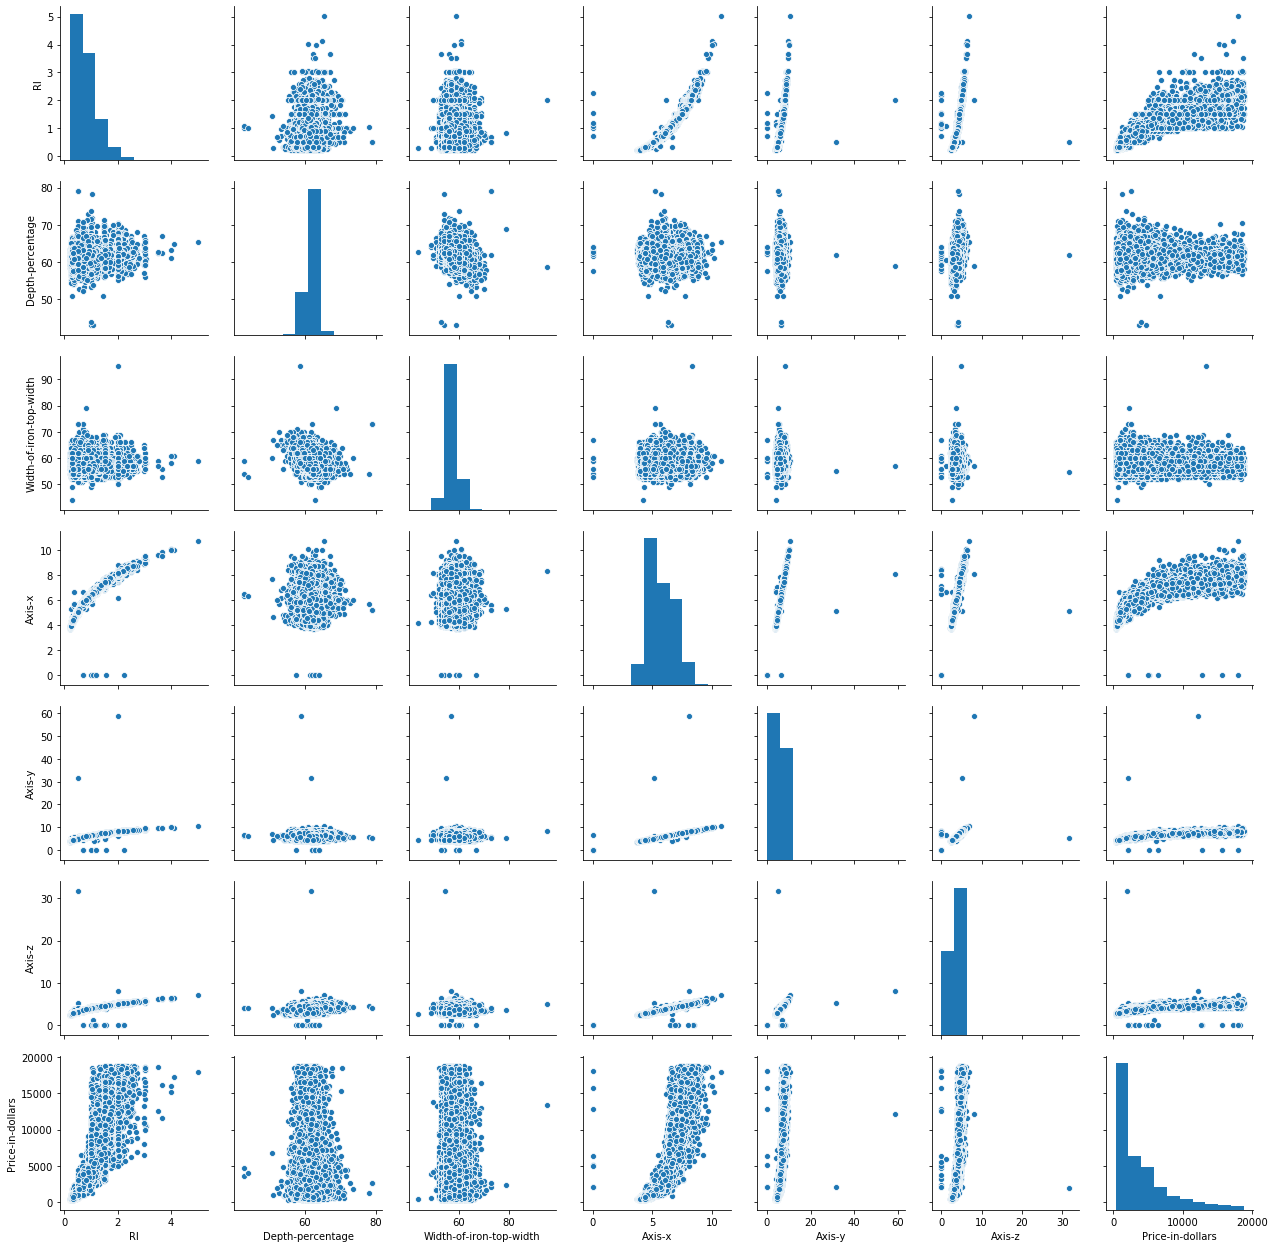

In [11]:
sns.pairplot(newdf)

In [12]:
traindf = pd.concat([traindf,pd.get_dummies(traindf['QA-check'], prefix='qa')],axis=1) 
traindf.drop(['QA-check'],axis=1, inplace=True)

In [13]:
traindf.head()

,RI,Color-check,Purity-Level,Depth-percentage,Width-of-iron-top-width,Axis-x,Axis-y,Axis-z,Price-in-dollars,ID,qa_Fair,qa_Good,qa_Ideal,qa_Premium,qa_Very Good
0,1.01,H,VS1,61.9,57.0,6.43,6.39,3.97,4779,uid_36947,0,0,0,1,0
1,0.41,E,VS1,59.8,61.0,4.85,4.79,2.88,1153,uid_36834,0,0,0,1,0
2,2.18,H,SI2,62.3,59.0,8.37,8.26,5.18,11579,uid_39061,0,0,0,1,0
3,0.71,F,VS2,59.5,58.0,5.82,5.87,3.48,2918,uid_39213,0,0,0,0,1
4,0.70,E,SI2,61.0,55.0,5.76,5.78,3.52,2332,uid_15924,0,0,1,0,0


In [14]:
traindf['Color-check'].value_counts()

G    8436
E    7359
F    7140
H    6255
D    5091
I    4047
J    2127
Name: Color-check, dtype: int64

In [15]:
traindf['Purity-Level'].value_counts()

SI1     9762
VS2     9162
SI2     6904
VS1     6157
VVS2    3839
VVS1    2722
IF      1344
I1       565
Name: Purity-Level, dtype: int64

In [16]:
traindf = pd.concat([traindf,pd.get_dummies(traindf['Color-check'], prefix='color')],axis=1) 
traindf.drop(['Color-check'],axis=1, inplace=True)

In [17]:
traindf = pd.concat([traindf,pd.get_dummies(traindf['Purity-Level'], prefix='purity')],axis=1) 
traindf.drop(['Purity-Level'],axis=1, inplace=True)

In [18]:
traindf.drop(['ID'],axis=1, inplace=True)

In [19]:
traindf.head()

,RI,Depth-percentage,Width-of-iron-top-width,Axis-x,Axis-y,Axis-z,Price-in-dollars,qa_Fair,qa_Good,qa_Ideal,...,color_I,color_J,purity_I1,purity_IF,purity_SI1,purity_SI2,purity_VS1,purity_VS2,purity_VVS1,purity_VVS2
0,1.01,61.9,57.0,6.43,6.39,3.97,4779,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.41,59.8,61.0,4.85,4.79,2.88,1153,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.18,62.3,59.0,8.37,8.26,5.18,11579,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.71,59.5,58.0,5.82,5.87,3.48,2918,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.70,61.0,55.0,5.76,5.78,3.52,2332,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [21]:
#traindf = traindf.apply(norm)

In [22]:
scaler = MinMaxScaler()

x = scaler.fit_transform(traindf)
#xtest = scaler.transform(xtest)

In [23]:
x[0,6]

0.24074174190409256

In [24]:
x = traindf.drop(['Price-in-dollars'],axis=1)
y = traindf['Price-in-dollars']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 42)

In [25]:
#scaler = MinMaxScaler()

#xtrain = scaler.fit_transform(xtrain)
#xtest = scaler.transform(xtest)

In [26]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 
   
# predicting the test set results 
y_pred = regressor.predict(xtest) 

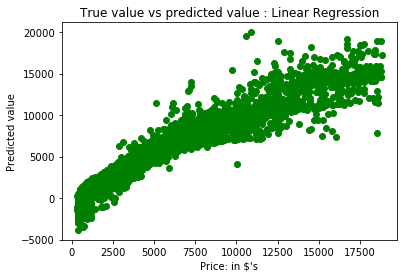

In [27]:
plt.scatter(ytest, y_pred, c = 'green') 
plt.xlabel("Price: in $'s") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

In [28]:
from sklearn.metrics import r2_score
r2 = 100 * r2_score(ytest, y_pred) 
print(" R2_score : ", r2)

 R2_score :  92.58621239968333


In [29]:
testdf.isnull().sum()

RI                         0
QA-check                   0
Color-check                0
Purity-Level               0
Depth-percentage           0
Width-of-iron-top-width    0
Axis-x                     0
Axis-y                     0
Axis-z                     0
ID                         0
dtype: int64

In [30]:
testdf.head()

,RI,QA-check,Color-check,Purity-Level,Depth-percentage,Width-of-iron-top-width,Axis-x,Axis-y,Axis-z,ID
0,0.31,Premium,E,SI1,62.3,56.0,4.40,4.37,2.73,uid_38808
1,0.31,Ideal,D,SI2,62.8,53.0,4.37,4.35,2.74,uid_36032
2,0.40,Ideal,D,VVS2,62.8,56.0,4.68,4.72,2.95,uid_28576
3,1.51,Ideal,F,SI1,62.5,57.0,7.27,7.32,4.56,uid_51190
4,0.26,Very Good,G,VS1,62.4,56.0,4.08,4.10,2.55,uid_10963


In [31]:
testdf = pd.concat([testdf,pd.get_dummies(testdf['QA-check'], prefix='qa')],axis=1) 
testdf.drop(['QA-check'],axis=1, inplace=True)
testdf = pd.concat([testdf,pd.get_dummies(testdf['Color-check'], prefix='color')],axis=1) 
testdf.drop(['Color-check'],axis=1, inplace=True)
testdf = pd.concat([testdf,pd.get_dummies(testdf['Purity-Level'], prefix='purity')],axis=1) 
testdf.drop(['Purity-Level'],axis=1, inplace=True)
#testdf.drop(['ID'],axis=1, inplace=True)

In [32]:
id = testdf['ID']
testdf.drop(['ID'],axis=1, inplace=True)

In [34]:
testdf.head()

,RI,Depth-percentage,Width-of-iron-top-width,Axis-x,Axis-y,Axis-z,qa_Fair,qa_Good,qa_Ideal,qa_Premium,...,color_I,color_J,purity_I1,purity_IF,purity_SI1,purity_SI2,purity_VS1,purity_VS2,purity_VVS1,purity_VVS2
0,0.31,62.3,56.0,4.40,4.37,2.73,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.31,62.8,53.0,4.37,4.35,2.74,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.40,62.8,56.0,4.68,4.72,2.95,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.51,62.5,57.0,7.27,7.32,4.56,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.26,62.4,56.0,4.08,4.10,2.55,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
#testdf = scaler.transform(testdf)

In [36]:
y_samplepred = regressor.predict(testdf) 

In [37]:
sampledf = pd.DataFrame([id,y_samplepred])
sampledf = sampledf.T
sampledf.columns=['ID','Price-in-dollars']

In [38]:
sampledf.head()

,ID,Price-in-dollars
0,uid_38808,-111.397
1,uid_36032,-714.163
2,uid_28576,2161.47
3,uid_51190,10406
4,uid_10963,226.337


In [39]:
#sampledf.to_csv('mysubmission.csv')